Method 1: ARIMA (Auto-Regressive Integrated Moving Average)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
#Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
#useful for forecasting time series data with both seasonal and non-seasonal components

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
#converting date to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [7]:
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)

<Axes: xlabel='date'>

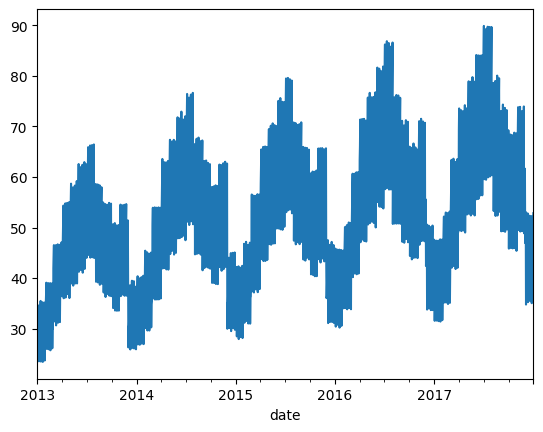

In [8]:
train.groupby('date').mean()['sales'].plot()

Text(0.5, 1.0, 'Average Sales Over Time')

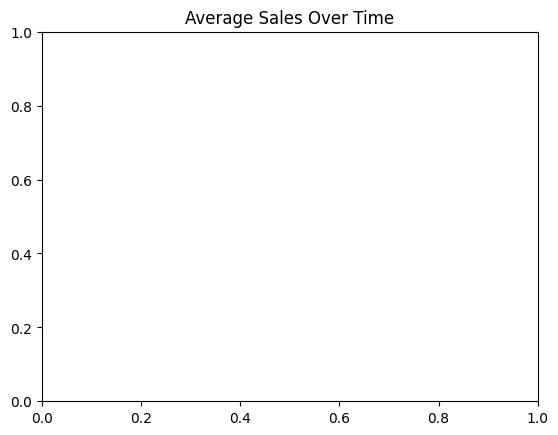

In [9]:
plt.title('Average Sales Over Time')

In [10]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

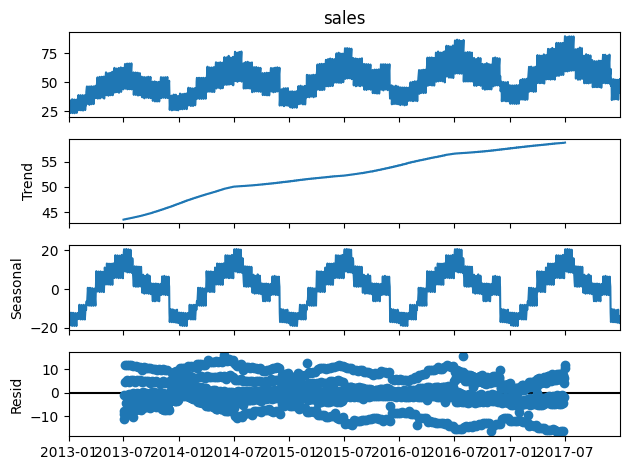

In [11]:
decomposition = seasonal_decompose(train.groupby('date').mean()['sales'], model='additive', period=365)
decomposition.plot()
plt.show()

In [12]:
# Differencing to achieve stationarity
train['sales_diff'] = train['sales'] - train['sales'].shift(1)

In [13]:
train.dropna(inplace=True)

<Axes: xlabel='date'>

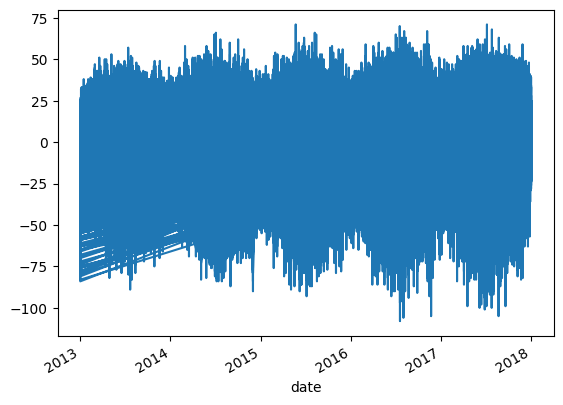

In [15]:
train['sales_diff'].plot()

Text(0.5, 1.0, 'Sales Differenced')

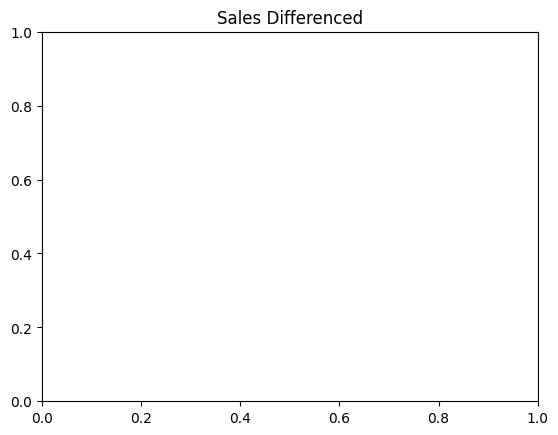

In [16]:
plt.title('Sales Differenced')

In [17]:
store_id = 1
item_id = 1

In [18]:
store_item_sales = train[(train['store'] == store_id) & (train['item'] == item_id)]['sales']

In [19]:
train_size = int(len(store_item_sales) * 0.8)

In [20]:
train_data = store_item_sales[0:train_size]

In [21]:
test_data = store_item_sales[train_size:len(store_item_sales)]

In [22]:
#Fitting the ARIMA Model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
model_fit = model.fit(disp=False)

In [24]:
forecast = model_fit.forecast(steps=len(test_data))

<Axes: xlabel='date'>

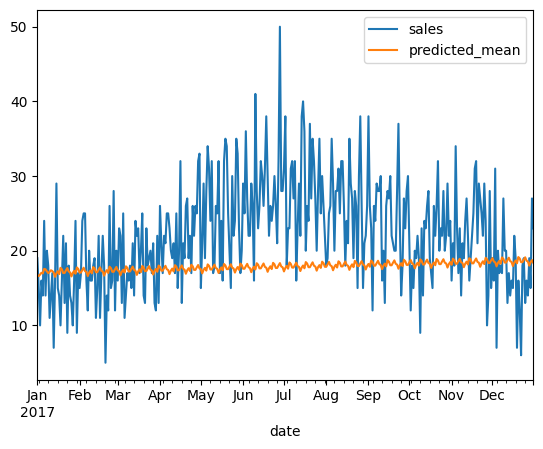

In [25]:
test_data.plot(legend=True)
forecast.plot(legend=True)

In [26]:
mse = mean_squared_error(test_data, forecast)

In [28]:
print(f'Mean Squared Error: {mse}') # damnnn!

Mean Squared Error: 66.02713642155408


In [30]:
forecast_period = 90

In [31]:
full_model = SARIMAX(store_item_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
full_model_fit = full_model.fit(disp=False)

In [33]:
forecast = full_model_fit.forecast(steps=forecast_period)

In [46]:
if len(store_item_sales) > 1:
    model = SARIMAX(store_item_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Avani Gala\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
forecast = model_fit.forecast(steps=90)

In [51]:
test_indices = test[(test['store'] == store_id) & (test['item'] == item_id)].index

In [55]:
for idx, val in zip(test_indices, forecast.values):
                submission.loc[idx, 'sales'] = val

In [58]:
submission.to_csv('arima_submission.csv', index=False) #what?